In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [405]:
df = pd.read_csv('Default.csv')

In [406]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [407]:
# Convert 'default' column into 1/0 binary column
df['default_bi'] = np.zeros(len(df.index))
df.loc[df['default'] == 'Yes', 'default_bi'] = 1

In [408]:
# Convert 'student' column into 1/0 binary column
df['student_bi'] = np.zeros(len(df.index))
df.loc[df['student'] == 'Yes', 'student_bi'] = 1

In [409]:
preds = ['income', 'balance', 'student_bi']

In [410]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.core import datetools

In [411]:
sample_df = df.sample(n=100)

In [412]:
from sklearn.model_selection import train_test_split

In [413]:
#Prepare data#
X_train, X_test, Y_train, Y_test = train_test_split(sample_df[preds], sample_df['default_bi'],
                                                    test_size=0.5, random_state=4)

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [415]:
logreg_clf = LogisticRegression()
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logreg_clf = logreg_clf.fit(X_train, Y_train)

# Predict values fro training set
Y_pred = res_logreg_clf.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP, TN, FP, FN)

0 45 3 2


In [416]:
# Metrics computed from a confusion matrix
print('Accuracy score:', accuracy_score(Y_test, Y_pred))

# Calculate TP rate or recall
print('Recall score:', recall_score(Y_test, Y_pred))

# Precision: When a positive value is predicted, how often is the prediction correct?
print('Precision score:', precision_score(Y_test, Y_pred))

Accuracy score: 0.9
Recall score: 0.0
Precision score: 0.0


In [417]:
## Logistic regression with statsmodels ##
lr_form = 'default_bi~' + '+'.join(preds)

In [418]:
logreg = smf.glm(formula=lr_form, data=sample_df, family=sm.families.Binomial()).fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             default_bi   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -5.8149
Date:                Sat, 16 Dec 2017   Deviance:                       11.630
Time:                        13:46:11   Pearson chi2:                     14.9
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1462      9.305     -2.595      0.009     -42.383      -5.909
income         0.0001      0.000      0.884      0.376      -0.000       0.000
balance        0.0114      0.004      2.763      0.006       0.003       0.019
student_bi     1.7291      2.821      0.613      0.540      -3.800       7.259
==============================================================================
"""

In [419]:
from sklearn.model_selection import KFold
#Calculated mean error on validation sets#
def get_cv_err(x_data, y_data, cvobj, regobj):

    cv_errs = []

    for train_idx, test_idx in cvobj.split(x_data):

        xtrain, xtest = x_data[train_idx], x_data[test_idx]
        ytrain, ytest = y_data[train_idx], y_data[test_idx]

        res_reg = regobj.fit(xtrain, ytrain)

        pred_reg = res_reg.predict(xtest)

        #Reshape necessary because predition produces a (1, n) numpy array, while ytest is (n, 1)#
        cv_errs.append(np.mean(np.power(np.reshape(ytest, pred_reg.shape) - pred_reg, 2)))
    
    return cv_errs


#K-fold CV strategy#
def kfold_err(x_data, y_data, num_splits=10):
    
    #Kfold Cross-validation#
    kfcv = KFold(n_splits=num_splits)

    klreg = LogisticRegression()

    return get_cv_err(x_data, y_data, kfcv, klreg)

In [420]:
#Return error after 5 different splits
cv_list = kfold_err(np.array(sample_df[preds]), np.array(sample_df['default_bi']), num_splits=5)
np.mean(cv_list)

0.080000000000000002

/////////////1.(b)

In [421]:
logreg = smf.glm(formula=lr_form, data=df, family=sm.families.Binomial()).fit()
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             default_bi   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -785.77
Date:                Sat, 16 Dec 2017   Deviance:                       1571.5
Time:                        13:46:13   Pearson chi2:                 7.00e+03
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
student_bi    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================
"""

> balance and student_bi is statistically significant

In [422]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state=1)

In [423]:
X_train = train_df[preds]
X_test = test_df[preds]
Y_train = train_df['default_bi']
Y_test = test_df['default_bi']

In [424]:
logreg_clf = LogisticRegression()
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logreg_clf = logreg_clf.fit(X_train, Y_train)

In [425]:
cross_val_score(res_logreg_clf, X_test, Y_test, cv=5, scoring='roc_auc').mean()

0.65636484337280954

////////////1. (c)

In [426]:
from sklearn.model_selection import cross_val_score
def caculate_auc(features):
    X_train = np.array(train_df[features])
    Y_train = np.array(train_df['default_bi'])
    Y_train = Y_train.astype('int')
    
    logit = LogisticRegression()
    res_logit = logit.fit(X_train, Y_train)
    
    X_test = np.array(test_df[features])
    Y_test = np.array(test_df['default_bi'])
    Y_test = Y_test.astype('int')
    
    return cross_val_score(res_logit, X_test, Y_test, cv=5, scoring='roc_auc').mean()

In [427]:
preds = ['income', 'balance', 'student_bi']

In [428]:
# first round iteration
for p in preds:
    auc_res = caculate_auc([p])
    print([p], auc_res)

['income'] 0.582134861975
['balance'] 0.943135099827
['student_bi'] 0.578185368209


>Pick the highest value => <b>balance</b> = 0.943135099827

In [429]:
preds.remove('balance')
print(preds)

['income', 'student_bi']


In [430]:
# second round iteration
for p in preds:
    pred_sec = ['balance']
    pred_sec.append(p)
    auc_res = caculate_auc(pred_sec)
    print(pred_sec, auc_res)

['balance', 'income'] 0.646392444833
['balance', 'student_bi'] 0.944039682202


>Pick the highest value => <b>balance, student_bi</b> = 0.944039682202

In [431]:
preds.remove('student_bi')
print(preds)

['income']


In [432]:
# third round iteration
for p in preds:
    pred_third = ['balance', 'student_bi']
    pred_third.append(p)
    auc_res = caculate_auc(pred_third)
    print(pred_third, auc_res)

['balance', 'student_bi', 'income'] 0.656364843373


> We can see 'balance' and 'student_bi' have the highest score

/////////2.(a)

In [433]:
preds = ['income', 'balance', 'student_bi']

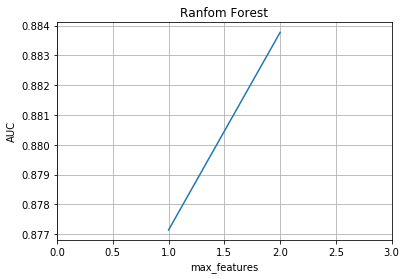

In [434]:
from sklearn.ensemble import RandomForestClassifier

max_features_range = np.arange(1, 3, 1)
scores = []

for num_features in max_features_range:
    rf = RandomForestClassifier(n_estimators = 100, max_features=num_features, min_samples_split=2)
    scores.append(cross_val_score(rf, X_train, Y_train, cv=5, scoring='roc_auc').mean())

plt.plot(max_features_range, scores)
plt.xlim([0.0, 3])
plt.title('Ranfom Forest')
plt.xlabel('max_features')
plt.ylabel('AUC')
plt.grid(True)
plt.show()

//////2. (b)

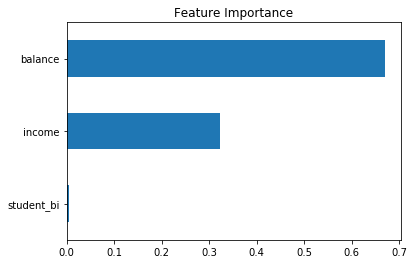

In [435]:
rf = RandomForestClassifier(n_estimators = 100, max_features="auto", min_samples_split=2)
rf_res = rf.fit(X_train, Y_train)

s = pd.Series(rf.feature_importances_, index=preds)
s.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

/////2. (c)

In [436]:
cross_val_score(rf_res, X_test, Y_test, cv=5, scoring='roc_auc').mean()

0.85344671232001357

//////3. (a)

In [437]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

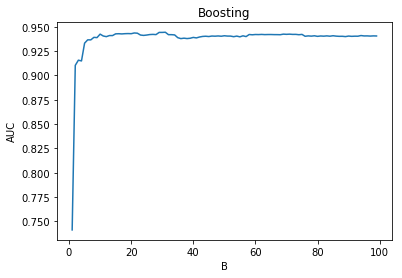

In [438]:
# Tuning Parameters for Boosting
# try B=1 through B=100 and record testing accuracy
B_range = np.arange(1, 100, 1)
scores = []

for b in B_range:
    boost = AdaBoostClassifier(n_estimators = b, learning_rate = 1.0)
    scores.append(cross_val_score(boost, X_train, Y_train, cv=5, scoring='roc_auc').mean())
    
plt.plot(B_range, scores)
plt.title('Boosting')
plt.xlabel('B')
plt.ylabel('AUC')
plt.show()

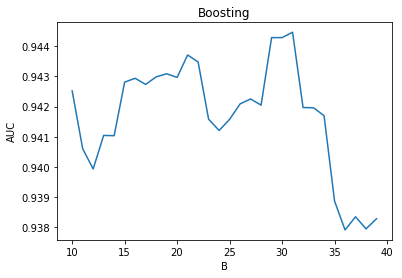

In [439]:
# Tuning Parameters for Boosting
# try B=10 through B=40 and record testing accuracy
B_range = np.arange(10, 40, 1)
scores = []

for b in B_range:
    boost = AdaBoostClassifier(n_estimators = b, learning_rate = 1.0)
    scores.append(cross_val_score(boost, X_train, Y_train, cv=5, scoring='roc_auc').mean())
    
plt.plot(B_range, scores)
plt.title('Boosting')
plt.xlabel('B')
plt.ylabel('AUC')
plt.show()

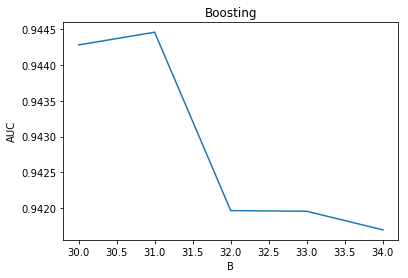

In [440]:
# Tuning Parameters for Boosting
# try B=30 through B=35 and record testing accuracy
B_range = np.arange(30, 35, 1)
scores = []

for b in B_range:
    boost = AdaBoostClassifier(n_estimators = b, learning_rate = 1.0)
    scores.append(cross_val_score(boost, X_train, Y_train, cv=5, scoring='roc_auc').mean())
    
plt.plot(B_range, scores)
plt.title('Boosting')
plt.xlabel('B')
plt.ylabel('AUC')
plt.show()

> We should choose b = 31

///////3. (b)

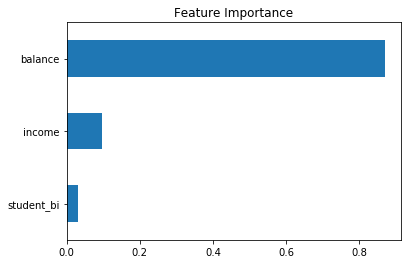

In [441]:
abc = AdaBoostClassifier(n_estimators = 31, learning_rate = 1.0)
abc_res = abc.fit(X_train, Y_train)

s = pd.Series(abc.feature_importances_, index=preds)
s.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

///////3. (c)

In [442]:
cross_val_score(abc_res, X_test, Y_test, cv=5, scoring='roc_auc').mean()

0.91983172872113828

//////4.(a)

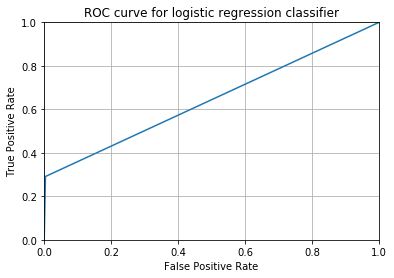

In [443]:
reg_best_features = ['balance', 'student_bi']

X_train = np.array(train_df[reg_best_features])
Y_train = np.array(train_df['default_bi'])
Y_train = Y_train.astype('int')

logreg_clf = LogisticRegression()
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logreg_clf = logreg_clf.fit(X_train, Y_train)

X_test = np.array(test_df[reg_best_features])
Y_test = np.array(test_df['default_bi'])
Y_test = Y_test.astype('int')

# Predict values fro training set
Y_pred = res_logreg_clf.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logistic regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

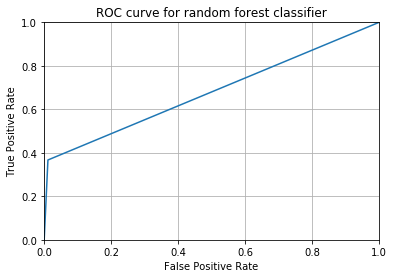

In [444]:
rf_best_features = ['balance', 'income']

X_train = np.array(train_df[rf_best_features])
Y_train = np.array(train_df['default_bi'])
Y_train = Y_train.astype('int')


rf = RandomForestClassifier(n_estimators = 100)
res_rf = rf.fit(X_train, Y_train)

X_test = np.array(test_df[rf_best_features])
Y_test = np.array(test_df['default_bi'])
Y_test = Y_test.astype('int')

# Predict values fro training set
Y_pred = res_rf.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)
    
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for random forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

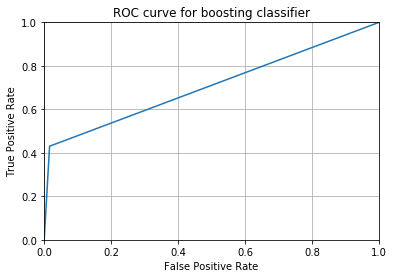

In [445]:
boot_best_features = ['balance', 'income']

X_train = np.array(train_df[boot_best_features])
Y_train = np.array(train_df['default_bi'])
Y_train = Y_train.astype('int')


boot = AdaBoostClassifier(n_estimators = 31, learning_rate = 1.0)
res_boot = boot.fit(X_train, Y_train)

X_test = np.array(test_df[boot_best_features])
Y_test = np.array(test_df['default_bi'])
Y_test = Y_test.astype('int')

# Predict values fro training set
Y_pred = res_boot.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)
    
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for boosting classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

////4. (b)

> Boosting

/////5.(a)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


df = pd.read_csv('Default.csv')

# Convert 'default' column into 1/0 binary column
df['default_bi'] = np.zeros(len(df.index))
df.loc[df['default'] == 'Yes', 'default_bi'] = 1
# Convert 'student' column into 1/0 binary column
df['student_bi'] = np.zeros(len(df.index))
df.loc[df['student'] == 'Yes', 'student_bi'] = 1

preds = ['income', 'balance', 'student_bi']

train_df, test_df = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state=1)

Y_train = train_df['default_bi']
Y_test = test_df['default_bi']
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

##### 1. logistic regression
logreg_clf = LogisticRegression()

reg_best_features = ['balance', 'student_bi']
X_train_reg = np.array(train_df[reg_best_features]）
X_test_reg = np.array(test_df[reg_best_features]）
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logreg_clf = logreg_clf.fit(X_train_reg, Y_train)

print('logistic regression accuracy', cross_val_score(res_logreg_clf, X_test_reg, Y_test, cv=5, scoring='roc_auc').mean())

# Predict values fro training set
Y_pred = res_logreg_clf.predict(X_test_reg)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logistic regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


##### 2. Random forest
rf = RandomForestClassifier(n_estimators = 100)
rf_best_features = ['balance', 'income']
X_train_rf = np.array(train_df[rf_best_features])
X_test_rf = np.array(test_df[rf_best_features])

res_rf = rf.fit(X_train_rf, Y_train)
                    
print('random forest accuracy', cross_val_score(res_rf, X_test_rf, Y_test, cv=5, scoring='roc_auc').mean())   

# Predict values fro training set
Y_pred = res_rf.predict(X_test_rf)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)
    
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for random forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
                      
##### 3. boosting
boot = AdaBoostClassifier(n_estimators = 31, learning_rate = 1.0)
boot_best_features = ['balance', 'income']
X_train_boot = np.array(train_df[boot_best_features])
X_test_boot = np.array(test_df[boot_best_features])

res_boot = boot.fit(X_train_boot, Y_train)

print('random forest accuracy', cross_val_score(res_boot, X_test_boot, Y_test, cv=5, scoring='roc_auc').mean())

# Predict values fro training set
Y_pred = res_boot.predict(X_test_boot)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label=1)
    
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for boosting classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

////////5.(b)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


df = pd.read_csv('Default.csv')

# Convert 'default' column into 1/0 binary column
df['default_bi'] = np.zeros(len(df.index))
df.loc[df['default'] == 'Yes', 'default_bi'] = 1
# Convert 'student' column into 1/0 binary column
df['student_bi'] = np.zeros(len(df.index))
df.loc[df['student'] == 'Yes', 'student_bi'] = 1

preds = ['income', 'balance', 'student_bi']

train_df, test_df = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state=1)

Y_train = train_df['default_bi']
Y_test = test_df['default_bi']
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

##### 1. logistic regression
logreg_clf = LogisticRegression()

reg_best_features = ['balance', 'student_bi']
X_train_reg = np.array(train_df[reg_best_features]）
X_test_reg = np.array(test_df[reg_best_features]）
# Fit model. let X_train = matric of predictors, Y_train = matric of variables
res_logreg_clf = logreg_clf.fit(X_train_reg, Y_train)

Y_pred_reg = res_logreg_clf.predict(X_test_reg)
# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred_reg)
print('logisitic regression confusion', confusion)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_reg, pos_label=1)
print('logistic regression fpr', fpr)
print('logistic regression tpr', tpr)
                      
                      
#### 2. random forest
rf = RandomForestClassifier(n_estimators = 100)
rf_best_features = ['balance', 'income']
X_train_rf = np.array(train_df[rf_best_features])
X_test_rf = np.array(test_df[rf_best_features])

res_rf = rf.fit(X_train_rf, Y_train)

Y_pred_rf = res_rf.predict(X_test_rf)

# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred_rf)
print('random forest confusion', confusion)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_rf, pos_label=1)
print('random forest fpr', fpr)
print('random forest tpr', tpr)

                      
### 3. boosting
boot = AdaBoostClassifier(n_estimators = 31, learning_rate = 1.0)
boot_best_features = ['balance', 'income']
X_train_boot = np.array(train_df[boot_best_features])
X_test_boot = np.array(test_df[boot_best_features])

res_boot = boot.fit(X_train_boot, Y_train)

Y_pred_boot = res_boot.predict(X_test_boot)
# Confusion matrix
confusion = confusion_matrix(Y_test, Y_pred_boot)
print('Boosting confusion', confusion)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_boot, pos_label=1)
print('Boosting fpr', fpr)
print('Boosting tpr', tpr)